In [49]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [50]:
# versi tensorflow yang digunakan harus versi 2 ke atas
print(tf.__version__)

2.7.0


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
!unzip "/content/drive/My Drive/masker.zip" -d "/content/drive/My Drive/masker/"

Archive:  /content/drive/My Drive/masker.zip
  inflating: /content/drive/My Drive/masker/dataset/with_mask/-110603108-gettyimages-533567012.jpg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/-110695084-mask2.jpg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/0-with-mask.jpg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/007563.jpg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/0779db20580fc7b054ad6b1b7bd9fb35.jpeg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/1-respirator-mask.jpg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/10-with-mask.jpg  
  inflating: /content/drive/My Drive/masker/dataset/with_mask/100-with-mask.jpg  
  in

In [53]:
# membuat sebuah direktori
base_dir = '/content/drive/My Drive/masker/dataset'

In [54]:
import os
os.listdir('/content/drive/My Drive/masker/dataset')

['with_mask', 'without_mask']

In [61]:
train_datamask = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    validation_split = 0.4, # set validation split 
    fill_mode = 'nearest')

test_datamask = ImageDataGenerator(
                    rescale=1./255
                  )

In [62]:
train_generator = train_datamask.flow_from_directory(
        base_dir,  # direktori data
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='binary',  # karena terdapat 3  kelas maka menggunakan class_mode = 'categorical'
        subset='training') # set as training data

validation_generator = train_datamask.flow_from_directory(
        base_dir,  # direktori data
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='binary', # karena terdapat 2  kelas maka menggunakan class_mode = 'binary'
        subset='validation') # set as validation data

Found 780 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [63]:
# membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # karena terdapat 3 kelas maka digunakan 'softmax'
])

In [64]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [65]:
model.fit(
    train_generator,
    steps_per_epoch = 25,  # banyaknya batch yang akan dieksekusi pada setiap epoch
    epochs = 20,
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 88s - loss: 0.4419 - accuracy: 0.7744 - val_loss: 0.1626 - val_accuracy: 0.9438 - 88s/epoch - 4s/step
Epoch 2/20
25/25 - 40s - loss: 0.1168 - accuracy: 0.9538 - val_loss: 0.1391 - val_accuracy: 0.9563 - 40s/epoch - 2s/step
Epoch 3/20
25/25 - 40s - loss: 0.1038 - accuracy: 0.9603 - val_loss: 0.0504 - val_accuracy: 0.9875 - 40s/epoch - 2s/step
Epoch 4/20
25/25 - 40s - loss: 0.1073 - accuracy: 0.9654 - val_loss: 0.0570 - val_accuracy: 0.9750 - 40s/epoch - 2s/step
Epoch 5/20
25/25 - 40s - loss: 0.0803 - accuracy: 0.9731 - val_loss: 0.1609 - val_accuracy: 0.9563 - 40s/epoch - 2s/step
Epoch 6/20
25/25 - 40s - loss: 0.0666 - accuracy: 0.9769 - val_loss: 0.1943 - val_accuracy: 0.9438 - 40s/epoch - 2s/step
Epoch 7/20
25/25 - 40s - loss: 0.0955 - accuracy: 0.9628 - val_loss: 0.0603 - val_accuracy: 0.9750 - 40s/epoch - 2s/step
Epoch 8/20
25/25 - 42s - loss: 0.0598 - accuracy: 0.9769 - val_loss: 0.1777 - val_accuracy: 0.9625 - 42s/epoch - 2s/step
Epoch 9/20
25/25 - 39s - loss: 0

In [66]:
model.save('drive/MyDrive/masker.h5')

In [67]:
# mengecek kelas dari data training
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

Saving download (4).jpg to download (4) (1).jpg
download (4).jpg
with mask


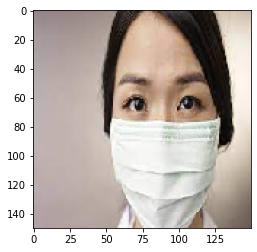

In [79]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==0:
    print('with mask')
  else:
    print('without mask')